<a href="https://colab.research.google.com/github/usha38/piecex/blob/main/pred_sensex_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas yfinance scikit-learn tensorflow matplotlib

In [2]:
#Predicting Sensex Using LSTM
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [13]:
#  Fetch historical Sensex data

sensex_data = yf.download('^BSESN', start='2010-01-01', end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [14]:
#  Preprocess the data
# Normalize the close price data

scaler = MinMaxScaler(feature_range=(0, 1))
sensex_data['Close'] = scaler.fit_transform(sensex_data['Close'].values.reshape(-1, 1))

In [5]:
# Create a function to prepare the dataset for LSTM

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [6]:
# Define the time step

time_step = 60

In [7]:
# Create the dataset

data = sensex_data['Close'].values
data = data.reshape(-1, 1)
X, y = create_dataset(data, time_step)

In [8]:
# Reshape input to be [samples, time steps, features]

X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
# Split the data into training and testing sets

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [15]:
#  Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Step 4: Train the model

model.fit(X_train, y_train, batch_size=1, epochs=1)

2900/2900 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - loss: 9.9586e-04


In [11]:
# Step 5: Predict future values

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [16]:
# Inverse transform the predictions to get actual values

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

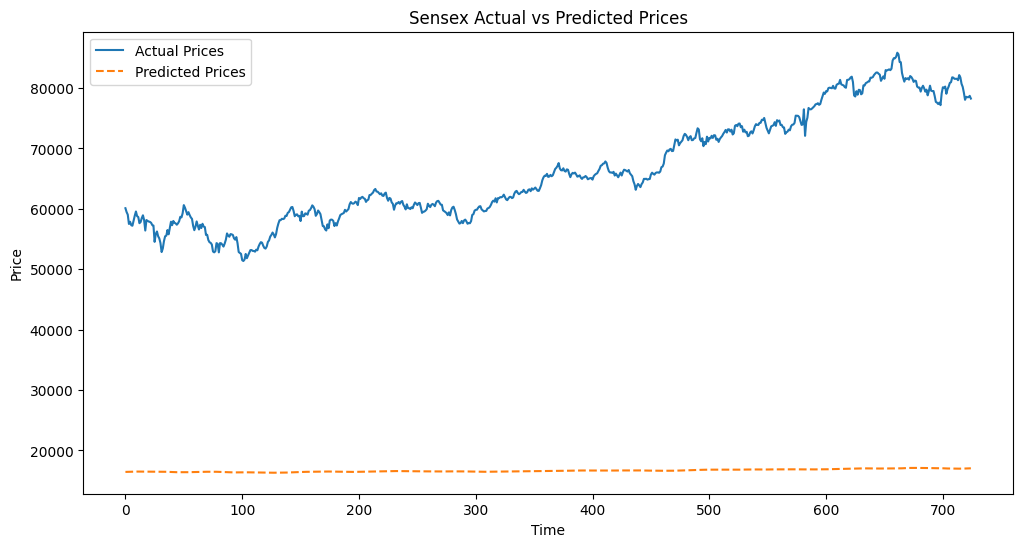

In [17]:
# Plot the actual vs. predicted prices

plt.figure(figsize=(12, 6))
plt.plot(actual_y_test, label='Actual Prices')
plt.plot(test_predict, label='Predicted Prices', linestyle='dashed')
plt.title('Sensex Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()